In [0]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as stm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [3]:
#importing data
from google.colab import files
uploaded = files.upload()


Saving data_pohovor.xlsx to data_pohovor.xlsx


In [0]:
#nacitanie dat
miss_value = ["unknown"]

import io
data = pd.read_excel(io.BytesIO(uploaded['data_pohovor.xlsx']), na_values = miss_value)

In [196]:
#ukazka dat
data.head()

,VEK,ZAMESTNANIE,RODINNY_STAV,VZDELANIE,DEFAULT,HYPO,SU,HYPO_BAL,SU_BAL,KREDIT_TXN,KONTACT_TYP,MESIAC,DEN,TRVANIE,POCET_KAMPANI,POCET_DNI,POCET_KONTAKTOVANI,VYSLEDOK_KAMPANE,EMP.VAR.RATE,CONS.PRICE.IDX,CONS.CONF.IDX,EURIBOR3M,NR.EMPLOYED,Y
0,18,student,single,high.school,no,no,no,NaN,NaN,971.13,telephone,nov,thu,75,1,999,0,nonexistent,-0.1,93.200,-42.0,4.245,5195.8,no
1,18,student,single,high.school,no,yes,yes,16018.57,3543.48,999.15,cellular,mar,tue,103,1,999,0,nonexistent,-1.8,92.843,-50.0,1.687,5099.1,no
2,18,student,single,basic,no,no,no,NaN,NaN,696.62,cellular,apr,thu,108,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
3,18,student,single,basic,no,yes,yes,18691.97,2303.03,576.59,cellular,apr,thu,184,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
4,18,student,single,high.school,no,no,no,NaN,NaN,1095.12,cellular,may,fri,271,1,999,1,failure,-1.8,92.893,-46.2,1.259,5099.1,yes


In [199]:
#datovy typ suboru
print(type(data))
#rozmer dat
print(data.shape)
#datove typy jednotlivych premennych
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
(40761, 24)
VEK                     int64
ZAMESTNANIE            object
RODINNY_STAV           object
VZDELANIE              object
DEFAULT                object
HYPO                   object
SU                     object
HYPO_BAL              float64
SU_BAL                float64
KREDIT_TXN            float64
KONTACT_TYP            object
MESIAC                 object
DEN                    object
TRVANIE                 int64
POCET_KAMPANI           int64
POCET_DNI               int64
POCET_KONTAKTOVANI      int64
VYSLEDOK_KAMPANE       object
EMP.VAR.RATE          float64
CONS.PRICE.IDX        float64
CONS.CONF.IDX         float64
EURIBOR3M             float64
NR.EMPLOYED           float64
Y                      object
dtype: object


In [200]:
#unique values v jednotlivych stlpcoch
for i in range(len(data.columns)):
  if data.iloc[:,i].dtypes == object:
    print(data.columns[i])
    print(np.unique(data.iloc[:,i].fillna("NAN")))  #fillna lebo s povodnym NaN nefungovalo np.unique pri data_type=object
  else:
    print(data.columns[i])
    print(np.unique(data.iloc[:,i]))

VEK
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70]
ZAMESTNANIE
['NAN' 'admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management'
 'retired' 'self-employed' 'services' 'student' 'technician' 'unemployed']
RODINNY_STAV
['NAN' 'divorced' 'married' 'single']
VZDELANIE
['NAN' 'basic' 'high.school' 'university.bachelor' 'university.master']
DEFAULT
['NAN' 'no' 'yes']
HYPO
['NAN' 'no' 'yes']
SU
['NAN' 'no' 'yes']
HYPO_BAL
[1361.85 1630.47 1633.69 ...     nan     nan     nan]
SU_BAL
[409.64 544.91 832.77 ...    nan    nan    nan]
KREDIT_TXN
[550.   550.02 550.03 ...    nan    nan    nan]
KONTACT_TYP
['cellular' 'telephone']
MESIAC
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
DEN
['fri' 'mon' 'thu' 'tue' 'wed']
TRVANIE
[   0    1    2 ... 3785 4199 4918]
POCET_KAMPANI
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 3

In [201]:
#zakladne statistiky
data.describe()

,VEK,HYPO_BAL,SU_BAL,KREDIT_TXN,TRVANIE,POCET_KAMPANI,POCET_DNI,POCET_KONTAKTOVANI,EMP.VAR.RATE,CONS.PRICE.IDX,CONS.CONF.IDX,EURIBOR3M,NR.EMPLOYED
count,40761.000000,21342.000000,6182.000000,40744.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000
mean,39.636834,56811.018405,11670.661661,1257.154134,258.117956,2.574103,964.286745,0.167538,0.107492,93.580362,-40.546706,3.650123,5168.475921
std,9.721637,29878.664776,3776.076121,574.153178,259.629267,2.778371,182.386105,0.484218,1.556840,0.574666,4.574778,1.720189,71.106836
min,18.000000,1361.850000,409.640000,550.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,33684.665000,8695.800000,679.967500,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.354000,5099.100000
50%,38.000000,48401.050000,12544.080000,1069.685000,179.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,79801.467500,14725.280000,1965.197500,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,70.000000,134904.850000,17988.680000,2100.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [202]:
data.groupby('Y').median()

,VEK,HYPO_BAL,SU_BAL,KREDIT_TXN,TRVANIE,POCET_KAMPANI,POCET_DNI,POCET_KONTAKTOVANI,EMP.VAR.RATE,CONS.PRICE.IDX,CONS.CONF.IDX,EURIBOR3M,NR.EMPLOYED
Y,,,,,,,,,,,,,
no,38,48552.84,12567.185,1065.44,164,2,999,0,1.1,93.918,-41.8,4.857,5195.8
yes,36,46682.23,12181.835,1452.53,460,2,999,0,-1.8,93.200,-40.8,1.270,5099.1


In [203]:
data.groupby('Y').mean()

,VEK,HYPO_BAL,SU_BAL,KREDIT_TXN,TRVANIE,POCET_KAMPANI,POCET_DNI,POCET_KONTAKTOVANI,EMP.VAR.RATE,CONS.PRICE.IDX,CONS.CONF.IDX,EURIBOR3M,NR.EMPLOYED
Y,,,,,,,,,,,,,
no,39.686690,57033.245093,11735.675374,1244.125701,220.894178,2.636339,984.679147,0.129718,0.265074,93.607095,-40.617858,3.829369,5177.037718
yes,39.228584,55052.968697,11115.436528,1363.870900,562.931695,2.064472,797.299820,0.477232,-1.182890,93.361453,-39.964067,2.182340,5098.366073


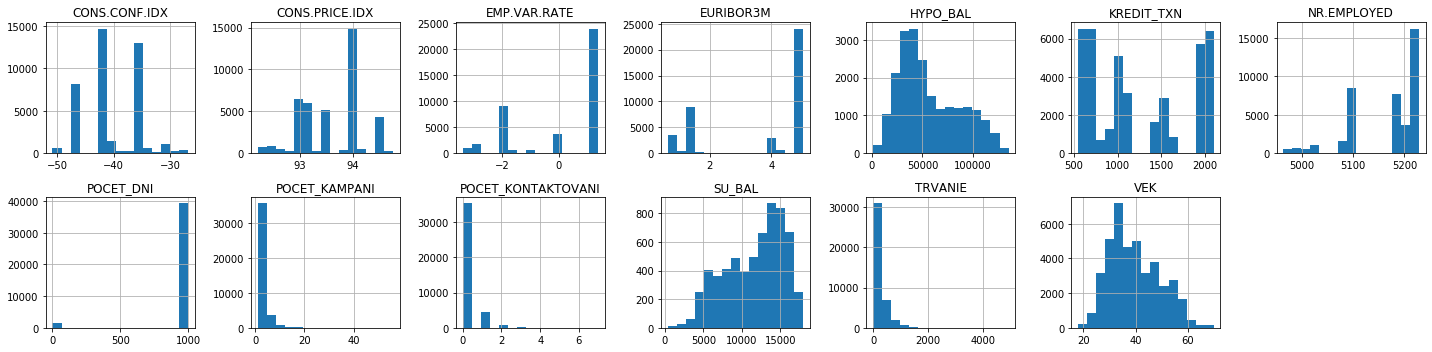

In [205]:
#histogramy numerickych premennych
numerical = ['VEK', 'HYPO_BAL', 'SU_BAL', 'KREDIT_TXN', 'TRVANIE', 'POCET_KAMPANI', 'POCET_DNI', 'POCET_KONTAKTOVANI', 'EMP.VAR.RATE', 'CONS.PRICE.IDX', 'CONS.CONF.IDX', 'EURIBOR3M', 'NR.EMPLOYED']

data[numerical].hist(bins=15, figsize=(20, 5), layout=(2, 7))
plt.tight_layout()

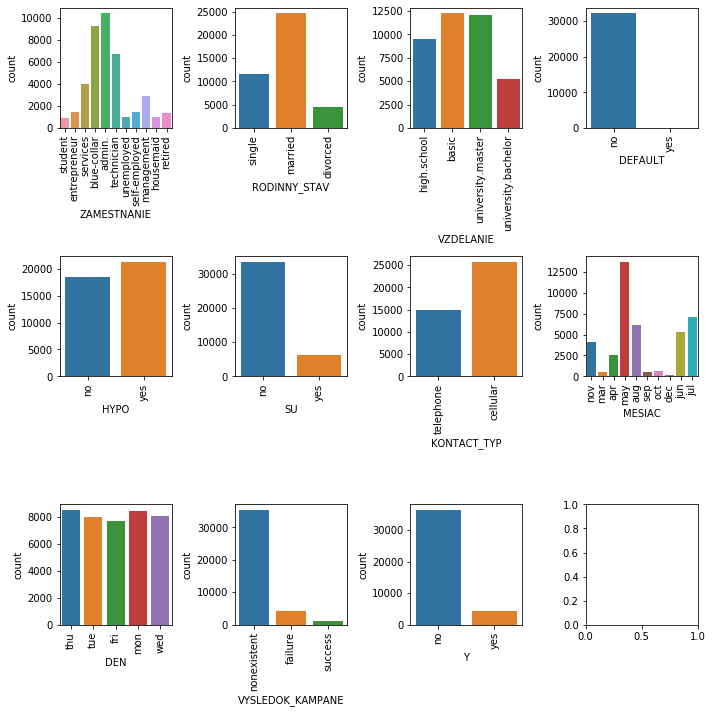

In [206]:
#histogramy kategorickych premennych
categorical = ['ZAMESTNANIE', 'RODINNY_STAV', 'VZDELANIE', 'DEFAULT', 'HYPO', 'SU', 'KONTACT_TYP', 'MESIAC', 'DEN', 'VYSLEDOK_KAMPANE', 'Y']

fig, ax = plt.subplots(3, 4, figsize=(10, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [211]:
#zastupenie zavislej premennej
print(data['Y'].value_counts()) 

no     36325
yes     4436
Name: Y, dtype: int64


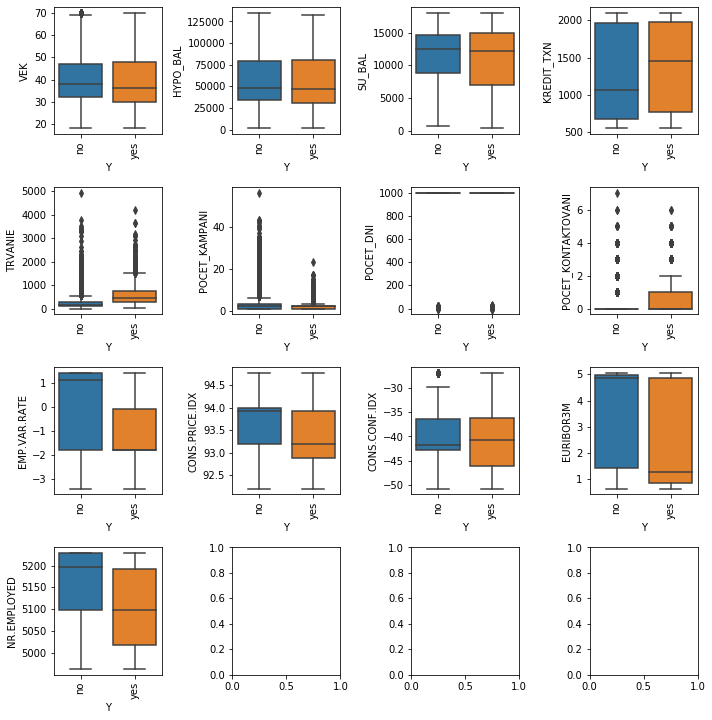

In [207]:
#boxplot len medzi Y a numerical variables
fig, ax = plt.subplots(4,4, figsize=(10, 10))
for var, subplot in zip(numerical, ax.flatten()):
  sns.boxplot(x='Y', y=var, data=data, ax=subplot)
  plt.tight_layout()
  for label in subplot.get_xticklabels():
        label.set_rotation(90)

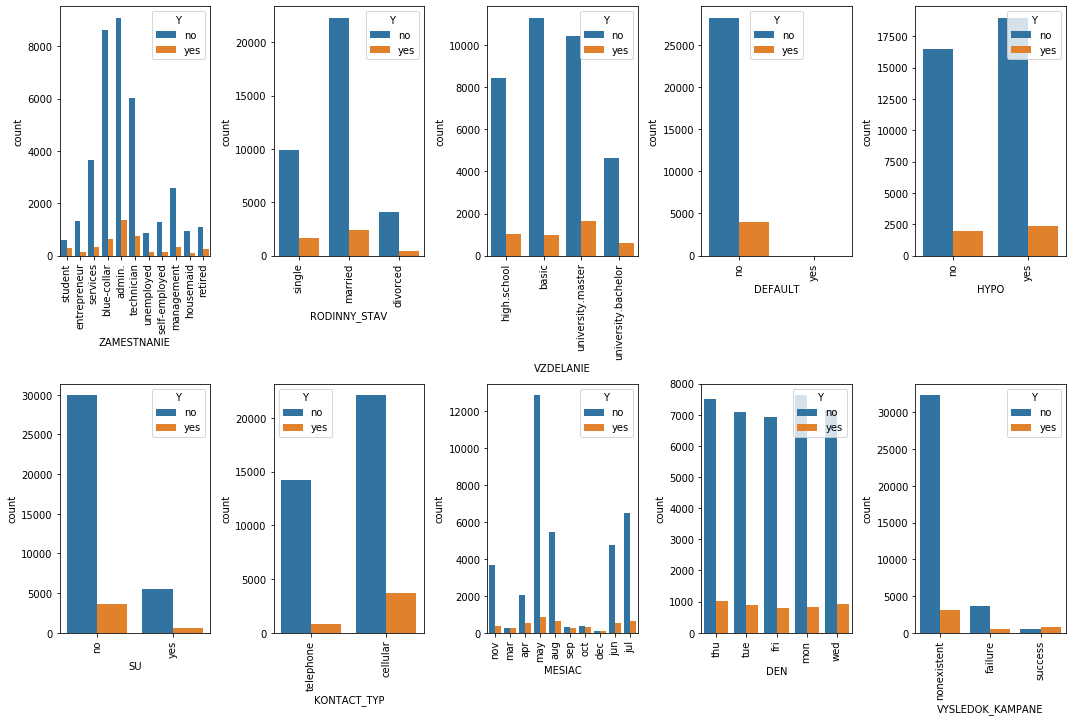

In [208]:
#relations among Y and categorical variables
fig, ax = plt.subplots(2,5, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
  sns.countplot(x=var, hue='Y', data=data, ax=subplot)
  plt.tight_layout()
  for label in subplot.get_xticklabels():
        label.set_rotation(90)

VEK                       0
ZAMESTNANIE             324
RODINNY_STAV             80
VZDELANIE              1702
DEFAULT                8556
HYPO                    980
SU                      980
HYPO_BAL              19419
SU_BAL                34579
KREDIT_TXN               17
KONTACT_TYP               0
MESIAC                    0
DEN                       0
TRVANIE                   0
POCET_KAMPANI             0
POCET_DNI                 0
POCET_KONTAKTOVANI        0
VYSLEDOK_KAMPANE          0
EMP.VAR.RATE              0
CONS.PRICE.IDX            0
CONS.CONF.IDX             0
EURIBOR3M                 0
NR.EMPLOYED               0
Y                         0
dtype: int64


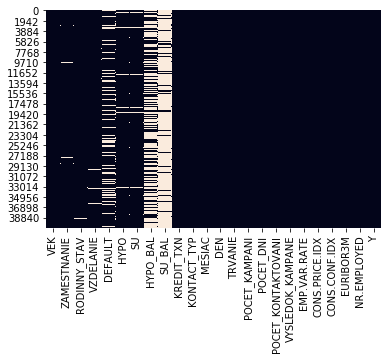

In [210]:
#missing values
print(data.isnull().sum()) #how many missing values in particular column
sns.heatmap(data.isnull(), cbar=False)

In [213]:
#v tychto stlpcoch mam missing values
df = pd.concat([data.iloc[:,[1,2,3,4,5,6,7,8,9]].fillna("NAN"),data.loc[:,'Y']],axis=1)

#NAN podla toho v ktorej triede zavislej premennej
for a in range(len(df.columns)):
  print(df[df.iloc[:,a]=='NAN'].groupby(['Y',df.iloc[:,a]])['Y'].count())

Y    ZAMESTNANIE
no   NAN            292
yes  NAN             32
Name: Y, dtype: int64
Y    RODINNY_STAV
no   NAN             68
yes  NAN             12
Name: Y, dtype: int64
Y    VZDELANIE
no   NAN          1479
yes  NAN           223
Name: Y, dtype: int64
Y    DEFAULT
no   NAN        8136
yes  NAN         420
Name: Y, dtype: int64
Y    HYPO
no   NAN     878
yes  NAN     102
Name: Y, dtype: int64
Y    SU 
no   NAN    878
yes  NAN    102
Name: Y, dtype: int64
Y    HYPO_BAL
no   NAN         17378
yes  NAN          2041
Name: Y, dtype: int64
Y    SU_BAL
no   NAN       30791
yes  NAN        3788
Name: Y, dtype: int64
Y    KREDIT_TXN
no   NAN           14
yes  NAN            3
Name: Y, dtype: int64
Series([], Name: Y, dtype: int64)


In [0]:
#nahradenie missing values v stlpcoch HYPO_BAL, SU_BAL nulou, ak vieme, či ma HYPO alebo SU
for i in range(len(data.iloc[:,0])):
  if ((data.loc[i,'HYPO'] == "no") & ((data.loc[i,'HYPO_BAL'] > 0) == False)):
    data.loc[i,'HYPO_BAL'] = 0 
  if ((data.loc[i,'SU'] == "no") & ((data.loc[i,'SU_BAL'] > 0) == False)):
    data.loc[i,'SU_BAL'] = 0 

In [216]:
#ZAMESTNANIE, RODINNY_STAV, VZDELANIE - Nan nahradim unknown naspať, lebo aj to nam môže niečo hovoriť o klientovi
data.loc[:,'ZAMESTNANIE'].fillna('unknown', inplace=True)
data.loc[:,'RODINNY_STAV'].fillna('unknown', inplace=True)
data.loc[:,'VZDELANIE'].fillna('unknown', inplace=True)

#pre kontrolu
print(data.loc[:,"ZAMESTNANIE"].unique())
print(data.loc[:,"RODINNY_STAV"].unique())
print(data.loc[:,"VZDELANIE"].unique())

['student' 'entrepreneur' 'services' 'blue-collar' 'admin.' 'technician'
 'unemployed' 'self-employed' 'management' 'housemaid' 'retired' 'unknown']
['single' 'married' 'divorced' 'unknown']
['high.school' 'basic' 'unknown' 'university.master' 'university.bachelor']


no     32202
yes        3
Name: DEFAULT, dtype: int64


(40761, 23)

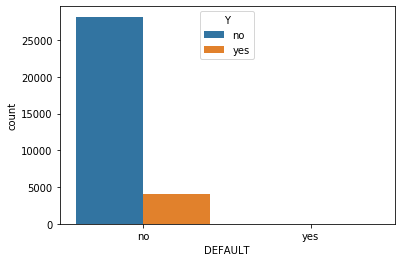

In [218]:
#pozriem sa na stlpec DEFAULT
sns.countplot(x='DEFAULT', hue='Y', data=data)

#zastupenie DEFAULT podla Y
print(data['DEFAULT'].value_counts())

#stlpec DEFAULT cely zmazem, kedze takmer vobec nevysvetluje Y
data.drop(['DEFAULT'], axis=1, inplace=True)
#pre kontrolu
data.shape

yes    21342
no     18439
Name: HYPO, dtype: int64


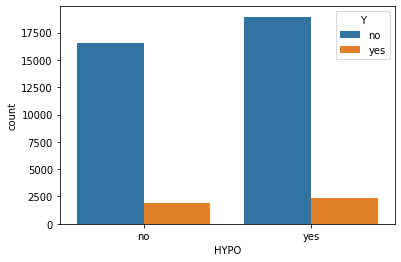

In [219]:
#pozriem sa na stlpec HYPO
sns.countplot(x="HYPO", hue='Y', data=data)
print(data['HYPO'].value_counts())

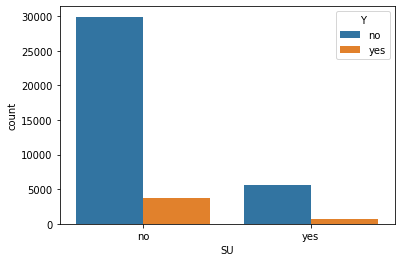

In [220]:
#pozriem sa na stlpec SU
sns.countplot(x="SU", hue='Y', data=data)

In [221]:
#zmazem riadky, kde HYPO, SU, HYPO_BAL, SU_BAL su nan, a KREDIT_TXN
print(data.shape) #40 761
data.dropna(subset=["HYPO"], inplace=True)
data.dropna(subset=["KREDIT_TXN"], inplace=True)
#pre kontrolu
print(data.shape) #39 764 x 23

(40761, 23)
(39764, 23)


In [222]:
#missing values pre kontrolu
data.isna().sum()

VEK                   0
ZAMESTNANIE           0
RODINNY_STAV          0
VZDELANIE             0
HYPO                  0
SU                    0
HYPO_BAL              0
SU_BAL                0
KREDIT_TXN            0
KONTACT_TYP           0
MESIAC                0
DEN                   0
TRVANIE               0
POCET_KAMPANI         0
POCET_DNI             0
POCET_KONTAKTOVANI    0
VYSLEDOK_KAMPANE      0
EMP.VAR.RATE          0
CONS.PRICE.IDX        0
CONS.CONF.IDX         0
EURIBOR3M             0
NR.EMPLOYED           0
Y                     0
dtype: int64

In [223]:
#zavisla premenna po odstraneni missing values
print(data['Y'].value_counts())

no     35433
yes     4331
Name: Y, dtype: int64


In [0]:
#categorical = ['ZAMESTNANIE', 'RODINNY_STAV', 'VZDELANIE', 'DEFAULT', 'HYPO', 'SU', 'KONTACT_TYP', 'MESIAC', 'DEN', 'VYSLEDOK_KAMPANE', 'Y']
#numerical = ['VEK', 'HYPO_BAL', 'SU_BAL', 'KREDIT_TXN', 'TRVANIE', 'POCET_KAMPANI', 'POCET_DNI', 'POCET_KONTAKTOVANI', 'EMP.VAR.RATE', 'CONS.PRICE.IDX', 'CONS.CONF.IDX', 'EURIBOR3M', 'NR.EMPLOYED']

#zmazem nazov stlpca, kedze som cely stlpec odstranila
categorical.remove('DEFAULT')


In [226]:
#creating dummies
dummies = pd.get_dummies(data.loc[:,categorical],drop_first=True)
print(dummies)
numericke = data.loc[:,numerical]
print(numericke)


       ZAMESTNANIE_blue-collar  ...  Y_yes
0                            0  ...      0
1                            0  ...      0
2                            0  ...      0
3                            0  ...      0
4                            0  ...      1
...                        ...  ...    ...
40756                        0  ...      1
40757                        0  ...      1
40758                        0  ...      0
40759                        0  ...      0
40760                        0  ...      1

[39764 rows x 37 columns]
       VEK  HYPO_BAL   SU_BAL  ...  CONS.CONF.IDX  EURIBOR3M  NR.EMPLOYED
0       18      0.00     0.00  ...          -42.0      4.245       5195.8
1       18  16018.57  3543.48  ...          -50.0      1.687       5099.1
2       18      0.00     0.00  ...          -47.1      1.365       5099.1
3       18  18691.97  2303.03  ...          -47.1      1.365       5099.1
4       18      0.00     0.00  ...          -46.2      1.259       5099.1
...    ...   

In [227]:
#spojenie dummies a numerickych premennych
data_new = pd.concat([dummies, numericke],axis=1)

print(data_new.shape)
data_new.head()


(39764, 50)


,ZAMESTNANIE_blue-collar,ZAMESTNANIE_entrepreneur,ZAMESTNANIE_housemaid,ZAMESTNANIE_management,ZAMESTNANIE_retired,ZAMESTNANIE_self-employed,ZAMESTNANIE_services,ZAMESTNANIE_student,ZAMESTNANIE_technician,ZAMESTNANIE_unemployed,ZAMESTNANIE_unknown,RODINNY_STAV_married,RODINNY_STAV_single,RODINNY_STAV_unknown,VZDELANIE_high.school,VZDELANIE_university.bachelor,VZDELANIE_university.master,VZDELANIE_unknown,HYPO_yes,SU_yes,KONTACT_TYP_telephone,MESIAC_aug,MESIAC_dec,MESIAC_jul,MESIAC_jun,MESIAC_mar,MESIAC_may,MESIAC_nov,MESIAC_oct,MESIAC_sep,DEN_mon,DEN_thu,DEN_tue,DEN_wed,VYSLEDOK_KAMPANE_nonexistent,VYSLEDOK_KAMPANE_success,Y_yes,VEK,HYPO_BAL,SU_BAL,KREDIT_TXN,TRVANIE,POCET_KAMPANI,POCET_DNI,POCET_KONTAKTOVANI,EMP.VAR.RATE,CONS.PRICE.IDX,CONS.CONF.IDX,EURIBOR3M,NR.EMPLOYED
0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,18,0.00,0.00,971.13,75,1,999,0,-0.1,93.200,-42.0,4.245,5195.8
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,18,16018.57,3543.48,999.15,103,1,999,0,-1.8,92.843,-50.0,1.687,5099.1
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,18,0.00,0.00,696.62,108,1,999,0,-1.8,93.075,-47.1,1.365,5099.1
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,18,18691.97,2303.03,576.59,184,2,999,0,-1.8,93.075,-47.1,1.365,5099.1
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,18,0.00,0.00,1095.12,271,1,999,1,-1.8,92.893,-46.2,1.259,5099.1


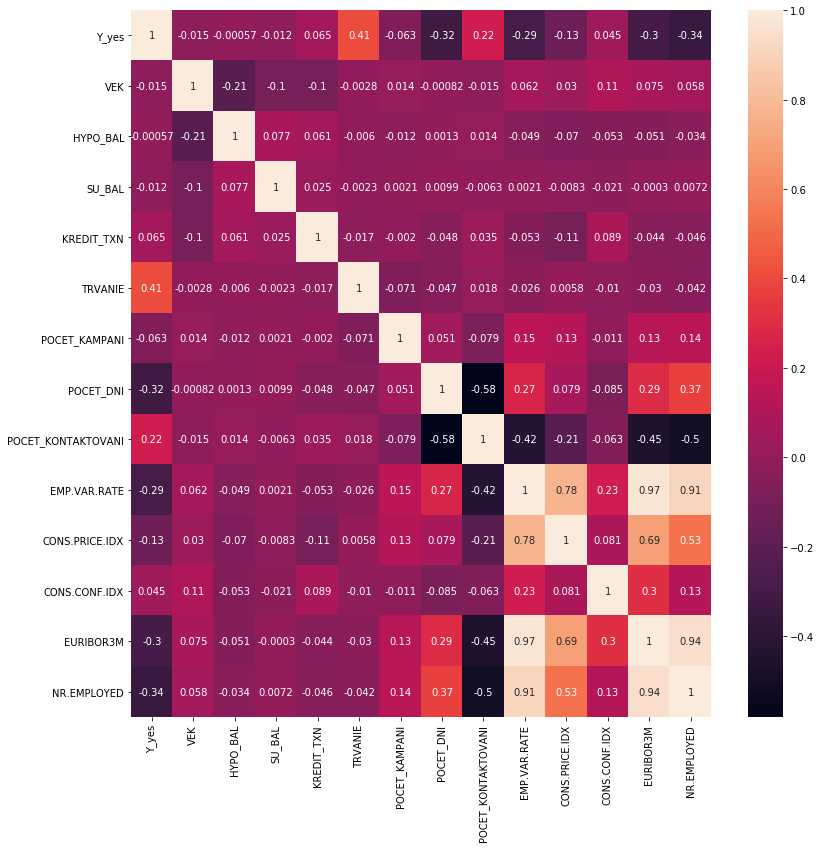

In [228]:
#correlation matrix (numerical variables and Y)
data_cor = pd.concat([dummies['Y_yes'], numericke],axis=1)
plt.figure(figsize=(13,13))
sns.heatmap(data_cor.corr(),annot=True)

In [0]:
#korelacna matiaca pre dummies
#d_nazvy = data_new.columns[1:37]
#d_nazvy 
#plt.figure(figsize=(15,15))
#sns.heatmap(data_new.loc[:,d_nazvy].corr())

In [229]:
#separate input features and target

#input features
X = data_new.drop('Y_yes', axis=1)
#target variable
y = data_new.loc[:,'Y_yes'].values 
print(X)
print(y)
print(X.columns)

       ZAMESTNANIE_blue-collar  ...  NR.EMPLOYED
0                            0  ...       5195.8
1                            0  ...       5099.1
2                            0  ...       5099.1
3                            0  ...       5099.1
4                            0  ...       5099.1
...                        ...  ...          ...
40756                        0  ...       4991.6
40757                        0  ...       4991.6
40758                        0  ...       4963.6
40759                        0  ...       4963.6
40760                        0  ...       4963.6

[39764 rows x 49 columns]
[0 0 0 ... 0 0 1]
Index(['ZAMESTNANIE_blue-collar', 'ZAMESTNANIE_entrepreneur',
       'ZAMESTNANIE_housemaid', 'ZAMESTNANIE_management',
       'ZAMESTNANIE_retired', 'ZAMESTNANIE_self-employed',
       'ZAMESTNANIE_services', 'ZAMESTNANIE_student', 'ZAMESTNANIE_technician',
       'ZAMESTNANIE_unemployed', 'ZAMESTNANIE_unknown', 'RODINNY_STAV_married',
       'RODINNY_STAV_single'

In [230]:
#multicollinearity
X_vif = X.to_numpy()

for i in range(X_vif.shape[1]):
  print(X.columns[i])
  print(variance_inflation_factor(X_vif, i))

ZAMESTNANIE_blue-collar
3.1078762617654627
ZAMESTNANIE_entrepreneur
1.1797979257060507
ZAMESTNANIE_housemaid
1.1827115441825478
ZAMESTNANIE_management
1.3428438668234426
ZAMESTNANIE_retired
1.33944711432612
ZAMESTNANIE_self-employed
1.1584051348744075
ZAMESTNANIE_services
1.5778748300448042
ZAMESTNANIE_student
1.2357906632148137
ZAMESTNANIE_technician
2.1103375628429335
ZAMESTNANIE_unemployed
1.12672570948374
ZAMESTNANIE_unknown
1.0803927667439137
RODINNY_STAV_married
6.651612277890698
RODINNY_STAV_single
4.097756091860753
RODINNY_STAV_unknown
1.0237687903192951
VZDELANIE_high.school
8.36984829851615
VZDELANIE_university.bachelor
18.859582537261986
VZDELANIE_university.master
98.83355295712829
VZDELANIE_unknown
1.2977163389887227
HYPO_yes
6.416444650917208
SU_yes
11.805970809498922
KONTACT_TYP_telephone
5.240084281499489
MESIAC_aug
8.495540207770146
MESIAC_dec
1.131371957394922
MESIAC_jul
5.588930327395188
MESIAC_jun
3.812619711008249
MESIAC_mar
1.2543346286674624
MESIAC_may
7.75025468

In [0]:
#odstranenie kolinearnych stlpcov - postupne

X = X.drop(['CONS.PRICE.IDX'], axis=1, inplace=False)
X = X.drop(['NR.EMPLOYED'], axis=1, inplace=False)
X = X.drop(['KREDIT_TXN'], axis=1, inplace=False)
X = X.drop(['POCET_DNI'], axis=1, inplace=False)
X = X.drop(['EURIBOR3M'], axis=1, inplace=False)
X = X.drop(['CONS.CONF.IDX'], axis=1, inplace=False)
X = X.drop(['VYSLEDOK_KAMPANE_nonexistent'], axis=1, inplace=False)
X = X.drop(['SU_yes'], axis=1, inplace=False)
X = X.drop(['VEK'], axis=1, inplace=False)
X = X.drop(['HYPO_yes'], axis=1, inplace=False)
X = X.drop(['RODINNY_STAV_married'], axis=1, inplace=False)

#uz mi nezostali ziadne premenne s vif>5
X_vif = X.to_numpy()
for i in range(X_vif.shape[1]):
  vif = variance_inflation_factor(X_vif, i)
  if vif > 5:
    print(X.columns[i])
    print(vif)
  

In [232]:
#pre kontrolu
X

,ZAMESTNANIE_blue-collar,ZAMESTNANIE_entrepreneur,ZAMESTNANIE_housemaid,ZAMESTNANIE_management,ZAMESTNANIE_retired,ZAMESTNANIE_self-employed,ZAMESTNANIE_services,ZAMESTNANIE_student,ZAMESTNANIE_technician,ZAMESTNANIE_unemployed,ZAMESTNANIE_unknown,RODINNY_STAV_single,RODINNY_STAV_unknown,VZDELANIE_high.school,VZDELANIE_university.bachelor,VZDELANIE_university.master,VZDELANIE_unknown,KONTACT_TYP_telephone,MESIAC_aug,MESIAC_dec,MESIAC_jul,MESIAC_jun,MESIAC_mar,MESIAC_may,MESIAC_nov,MESIAC_oct,MESIAC_sep,DEN_mon,DEN_thu,DEN_tue,DEN_wed,VYSLEDOK_KAMPANE_success,HYPO_BAL,SU_BAL,TRVANIE,POCET_KAMPANI,POCET_KONTAKTOVANI,EMP.VAR.RATE
0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.00,0.00,75,1,0,-0.1
1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,16018.57,3543.48,103,1,0,-1.8
2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.00,0.00,108,1,0,-1.8
3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18691.97,2303.03,184,2,0,-1.8
4,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.00,0.00,271,1,1,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40756,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,2138.67,0.00,356,3,1,-1.7
40757,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.00,0.00,411,1,0,-1.7
40758,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3891.03,0.00,380,4,0,-1.1
40759,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.00,0.00,122,1,3,-1.1


In [0]:
#splitting data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [234]:
#SCALING FEATURES

#categorical features
X_train_k = X_train.loc[:, X.columns[0:32]] 
X_train_k.index = list(range(0,31811))
#print(X_train_k.columns)

X_test_k = X_test.loc[:, X.columns[0:32]] 
X_test_k.index = list(range(0,7953))
#print(X_test_k.columns)

#scaling (without categorical features)
X_train = pd.DataFrame(preprocessing.scale(X_train.loc[:,X.columns[32:38]])) 
X_test = pd.DataFrame(preprocessing.scale(X_test.loc[:,X.columns[32:38]])) 
print(X_train.columns)

#premenovanie stlpcov
X_train.columns = X.columns[32:38]
X_test.columns = X.columns[32:38]

#concatenating all features
X_train = pd.concat([X_train, X_train_k],axis=1)
X_test = pd.concat([X_test, X_test_k],axis=1)

print(X_train.shape)
print(X_test.shape)
print(X_train.columns)
print(X_train)

RangeIndex(start=0, stop=6, step=1)
(31811, 38)
(7953, 38)
Index(['HYPO_BAL', 'SU_BAL', 'TRVANIE', 'POCET_KAMPANI', 'POCET_KONTAKTOVANI',
       'EMP.VAR.RATE', 'ZAMESTNANIE_blue-collar', 'ZAMESTNANIE_entrepreneur',
       'ZAMESTNANIE_housemaid', 'ZAMESTNANIE_management',
       'ZAMESTNANIE_retired', 'ZAMESTNANIE_self-employed',
       'ZAMESTNANIE_services', 'ZAMESTNANIE_student', 'ZAMESTNANIE_technician',
       'ZAMESTNANIE_unemployed', 'ZAMESTNANIE_unknown', 'RODINNY_STAV_single',
       'RODINNY_STAV_unknown', 'VZDELANIE_high.school',
       'VZDELANIE_university.bachelor', 'VZDELANIE_university.master',
       'VZDELANIE_unknown', 'KONTACT_TYP_telephone', 'MESIAC_aug',
       'MESIAC_dec', 'MESIAC_jul', 'MESIAC_jun', 'MESIAC_mar', 'MESIAC_may',
       'MESIAC_nov', 'MESIAC_oct', 'MESIAC_sep', 'DEN_mon', 'DEN_thu',
       'DEN_tue', 'DEN_wed', 'VYSLEDOK_KAMPANE_success'],
      dtype='object')
       HYPO_BAL   SU_BAL   TRVANIE  ...  DEN_tue  DEN_wed  VYSLEDOK_KAMPANE_success
0 

In [235]:
#LOGISTIC REGRESSION

logreg = LogisticRegression(max_iter=1000)

y_train = np.reshape(y_train,len(y_train),)

#fitting the model with data
logreg.fit(X_train,y_train)

#predictions
y_pred=logreg.predict(X_test)

#vysledne pravdepodobnosti
print(logistic_regression.predict_proba(X_test))

[[0.985811   0.014189  ]
 [0.88059528 0.11940472]
 [0.98157671 0.01842329]
 ...
 [0.86991514 0.13008486]
 [0.91073354 0.08926646]
 [0.99359401 0.00640599]]


In [236]:
#metrics - precision, recall, f1-score, accuracy
print(classification_report(y_test.ravel(),y_pred))
print("Accuracy:",metrics.accuracy_score(y_test.ravel(), y_pred))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7112
           1       0.62      0.40      0.49       841

    accuracy                           0.91      7953
   macro avg       0.78      0.68      0.72      7953
weighted avg       0.90      0.91      0.90      7953

Accuracy: 0.9105997736703131


array([[6907,  205],
       [ 506,  335]])

0.9286386392545164


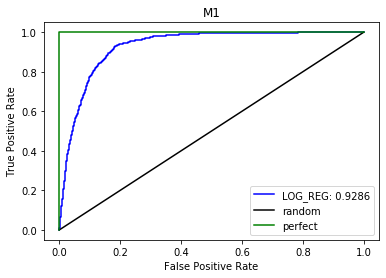

In [237]:
#AUC metrics
y_pred_p=logreg.predict_proba(X_test)
#y_test = np.reshape(y_test,len(y_test),)
#print(y_test.shape)

roc_auc = metrics.roc_auc_score(y_test, y_pred_p[:,1])
print(roc_auc)

#plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p[:,1])

plt.plot(fpr,tpr,'b-', label= 'LOG_REG: %.4f'%roc_auc)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("M1")
plt.show()

In [238]:
print(y_train[y_train==1].shape)
print(y_train[y_train==0].shape)

#SMOTE, ratio = 1
sm = SMOTE(random_state=27, ratio=1)
X_train_s, y_train_s = sm.fit_sample(X_train, y_train.ravel())

print(y_train_s[y_train_s==1].shape)
print(y_train_s[y_train_s==0].shape)

(3490,)
(28321,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(28321,)
(28321,)


In [239]:
#LOGISTIC REGRESSION with SMOTE

#fitting the model with data
logreg.fit(X_train_s,y_train_s)

#predictions
y_pred_s=logreg.predict(X_test) 

print(logistic_regression.predict_proba(X_test))

[[0.985811   0.014189  ]
 [0.88059528 0.11940472]
 [0.98157671 0.01842329]
 ...
 [0.86991514 0.13008486]
 [0.91073354 0.08926646]
 [0.99359401 0.00640599]]


In [240]:
#metrics - prec
print(classification_report(y_test,y_pred_s))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_s))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_s)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7112
           1       0.42      0.86      0.57       841

    accuracy                           0.86      7953
   macro avg       0.70      0.86      0.74      7953
weighted avg       0.92      0.86      0.88      7953

Accuracy: 0.8606815038350308
[[6121  991]
 [ 117  724]]


0.929366587797215


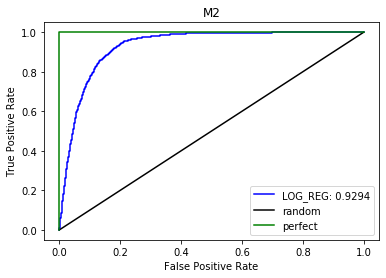

In [241]:
#AUC metrics
y_pred_p_s=logreg.predict_proba(X_test)
#y_test = np.reshape(y_test,len(y_test),)
#print(y_test.shape)
roc_auc = metrics.roc_auc_score(y_test, y_pred_p_s[:,1])
print(roc_auc)

#plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p_s[:,1])
#print(fpr)
#print(tpr)
#print(thresholds)

plt.plot(fpr,tpr,'b-', label= 'LOG_REG: %.4f'%roc_auc)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("M2")
plt.show()

In [244]:
#RANDOM FOREST

clf=RandomForestClassifier(n_estimators = 100, random_state=27)

#y_train = np.reshape(y_train,len(y_train),)
#fitting the model with data
clf.fit(X_train,y_train)

#predictions
y_pred=clf.predict(X_test)

#metrics - precision, recall, f1-score, accuracy
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#confusion matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7112
           1       0.61      0.46      0.53       841

    accuracy                           0.91      7953
   macro avg       0.78      0.71      0.74      7953
weighted avg       0.90      0.91      0.91      7953

Accuracy: 0.9122343769646675
[[6869  243]
 [ 455  386]]


0.9319925693741313


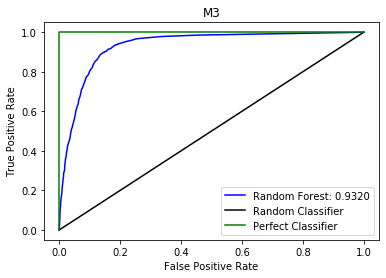

In [245]:
#AUC metrics
y_pred_p=clf.predict_proba(X_test)
#y_test = np.reshape(y_test,len(y_test),)
#print(y_test.shape)
roc_auc = metrics.roc_auc_score(y_test, y_pred_p[:,1])
print(roc_auc)

#plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p[:,1])

plt.plot(fpr,tpr,'b-', label= 'Random Forest: %.4f'%roc_auc)
plt.plot([0,1],[0,1],'k-',label='Random Classifier')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='Perfect Classifier')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("M3")
plt.show()

[0.09087716 0.03178061 0.35031019 0.05207866 0.031823   0.08277121
 0.01152989 0.00548663 0.00436513 0.00925549 0.00752957 0.00581386
 0.00888112 0.00638809 0.01322458 0.00515045 0.00209152 0.01887477
 0.00087611 0.01429497 0.0105766  0.01499601 0.0064321  0.0139637
 0.00788181 0.00292685 0.00827663 0.00866635 0.01332634 0.01712333
 0.00661571 0.01110343 0.006775   0.01515626 0.01564618 0.01471099
 0.01509511 0.05732459]
Index(['HYPO_BAL', 'SU_BAL', 'TRVANIE', 'POCET_KAMPANI', 'POCET_KONTAKTOVANI',
       'EMP.VAR.RATE', 'ZAMESTNANIE_blue-collar', 'ZAMESTNANIE_entrepreneur',
       'ZAMESTNANIE_housemaid', 'ZAMESTNANIE_management',
       'ZAMESTNANIE_retired', 'ZAMESTNANIE_self-employed',
       'ZAMESTNANIE_services', 'ZAMESTNANIE_student', 'ZAMESTNANIE_technician',
       'ZAMESTNANIE_unemployed', 'ZAMESTNANIE_unknown', 'RODINNY_STAV_single',
       'RODINNY_STAV_unknown', 'VZDELANIE_high.school',
       'VZDELANIE_university.bachelor', 'VZDELANIE_university.master',
       'VZDELAN

([<matplotlib.axis.XTick at 0x7fbc7a6e5be0>,
 <a list of 38 Text xticklabel objects>)

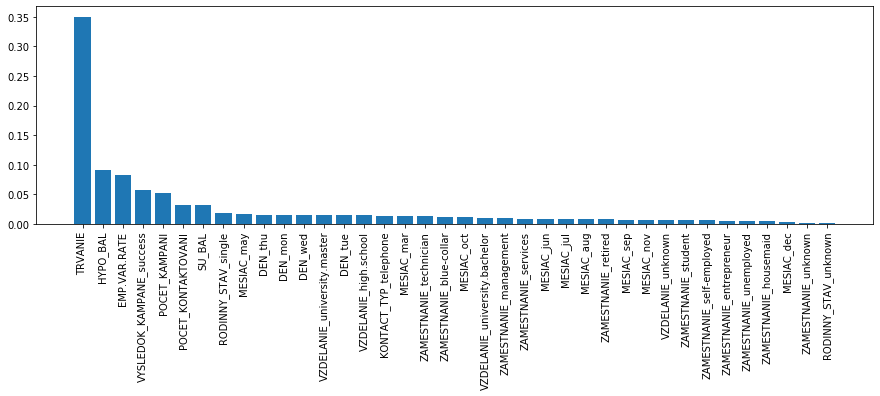

In [246]:
#feature importances and selection
importances = clf.feature_importances_
print(importances)

features = X_train.columns
print(features)
indices = np.argsort(importances)[::-1]
print(indices)

#graficke znazornenie dolezitych premennych
plt.figure(figsize=(15,4))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical')

In [247]:
#random forest smote
print(y_train[y_train==1].shape)#minority
print(y_train[y_train==0].shape)#majority

#SMOTE, ratio = 1
sm = SMOTE(random_state=27, ratio=1)
X_train_s, y_train_s = sm.fit_sample(X_train, y_train.ravel())

print(y_train_s[y_train_s==1].shape)
print(y_train_s[y_train_s==0].shape)

(3490,)
(28321,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(28321,)
(28321,)


In [248]:
#RANDOM FOREST

y_train = np.reshape(y_train,len(y_train),)
#fitting the model with data
clf.fit(X_train_s,y_train_s)

#predictions
y_pred_s=clf.predict(X_test)

#metrics - precision, recall, f1-score, accuracy
print(classification_report(y_test,y_pred_s))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_s))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_s)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7112
           1       0.41      0.72      0.52       841

    accuracy                           0.86      7953
   macro avg       0.69      0.80      0.72      7953
weighted avg       0.91      0.86      0.88      7953

Accuracy: 0.8615616748396832
[[6246  866]
 [ 235  606]]


0.9009428220996751


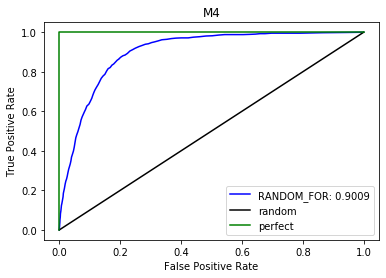

In [249]:
#AUC metrics
y_pred_p_s=clf.predict_proba(X_test)
#y_test = np.reshape(y_test,len(y_test),)
#print(y_test.shape)
roc_auc = metrics.roc_auc_score(y_test, y_pred_p_s[:,1])
print(roc_auc)

#plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p_s[:,1])

plt.plot(fpr,tpr,'b-', label= 'RANDOM_FOR: %.4f'%roc_auc)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("M4")
plt.show()

In [252]:
#logisticka regresia na zaklade top features
features_top = ['TRVANIE', 'HYPO_BAL', 'EMP.VAR.RATE', 'VYSLEDOK_KAMPANE_success', 'POCET_KAMPANI', 'POCET_KONTAKTOVANI', 'SU_BAL', 'RODINNY_STAV_single', 'MESIAC_may']
logReg = stm.Logit(y_train, X_train[features_top])
logistic_regression = logReg.fit()
print(logistic_regression.summary)
print(logistic_regression.params)

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x7fbc7b103f60>>
TRVANIE                     0.953422
HYPO_BAL                    0.049521
EMP.VAR.RATE               -0.728458
VYSLEDOK_KAMPANE_success    0.443206
POCET_KAMPANI               0.010758
POCET_KONTAKTOVANI          0.132264
SU_BAL                      0.025444
RODINNY_STAV_single        -1.935691
MESIAC_may                 -3.069957
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [253]:
clf = LogisticRegression(random_state=0).fit(X_train[features_top], y_train)
y_pred = clf.predict(X_test[features_top])
print(clf.predict_proba(X_test[features_top]))
#metrics - precision, recall, f1-score, accuracy
print(classification_report(y_test.ravel(),y_pred))
print("Accuracy:",metrics.accuracy_score(y_test.ravel(), y_pred))
#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

[[0.98754351 0.01245649]
 [0.89524891 0.10475109]
 [0.96705976 0.03294024]
 ...
 [0.82069307 0.17930693]
 [0.94093891 0.05906109]
 [0.99151973 0.00848027]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7112
           1       0.60      0.36      0.45       841

    accuracy                           0.91      7953
   macro avg       0.76      0.67      0.70      7953
weighted avg       0.89      0.91      0.90      7953

Accuracy: 0.9069533509367534


array([[6909,  203],
       [ 537,  304]])

0.9248725003310376


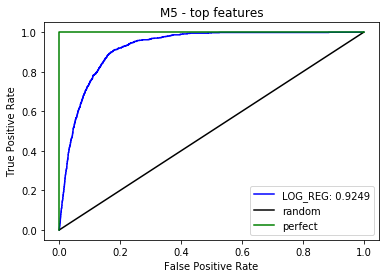

In [255]:
#AUC metrics
y_pred_p=clf.predict_proba(X_test[features_top])
#y_test = np.reshape(y_test,len(y_test),)
#print(y_test.shape)
roc_auc = metrics.roc_auc_score(y_test, y_pred_p[:,1])
print(roc_auc)

#plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p[:,1])

plt.plot(fpr,tpr,'b-', label= 'LOG_REG: %.4f'%roc_auc)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("M5 - top features")
plt.show()